In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
url = "https://docs.google.com/spreadsheets/d/17DCD4z3cyF2OtnowGDCIcRKfp565SKMUTu0UecTyX-c/export?format=csv"
df = pd.read_csv(url)

In [3]:

# Preprocess timestamps
def parse_relative_time(time_str):
    now = datetime.now()
    if pd.isna(time_str):
        return pd.NaT
    try:
        parts = time_str.split()
        value = int(parts[0])
        unit = parts[1].lower()
        if "hour" in unit:
            delta = timedelta(hours=value)
        elif "day" in unit:
            delta = timedelta(days=value)
        else:
            return pd.NaT
        return now - delta
    except:
        return pd.NaT

df['Posted / Live'] = df['Posted / Live'].apply(parse_relative_time)

# Filter relevant roles
keywords = r'data scien|machine learn|ai engineer|data analys'
role_filter = df['Position'].str.contains(keywords, case=False, na=False)
df_roles = df[role_filter].copy()

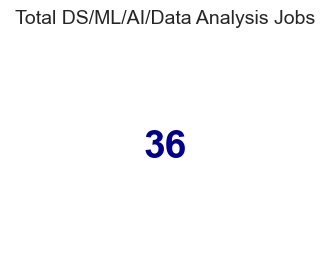

In [23]:
total_jobs = role_filter.sum()

# Create figure
fig, ax = plt.subplots(figsize=(4, 3))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.text(0.5, 0.5, f"{total_jobs:,}", fontsize=28, fontweight="bold", ha="center", va="center", color="darkblue")
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.title("Total DS/ML/AI/Data Analysis Jobs", fontsize=14)
plt.show()


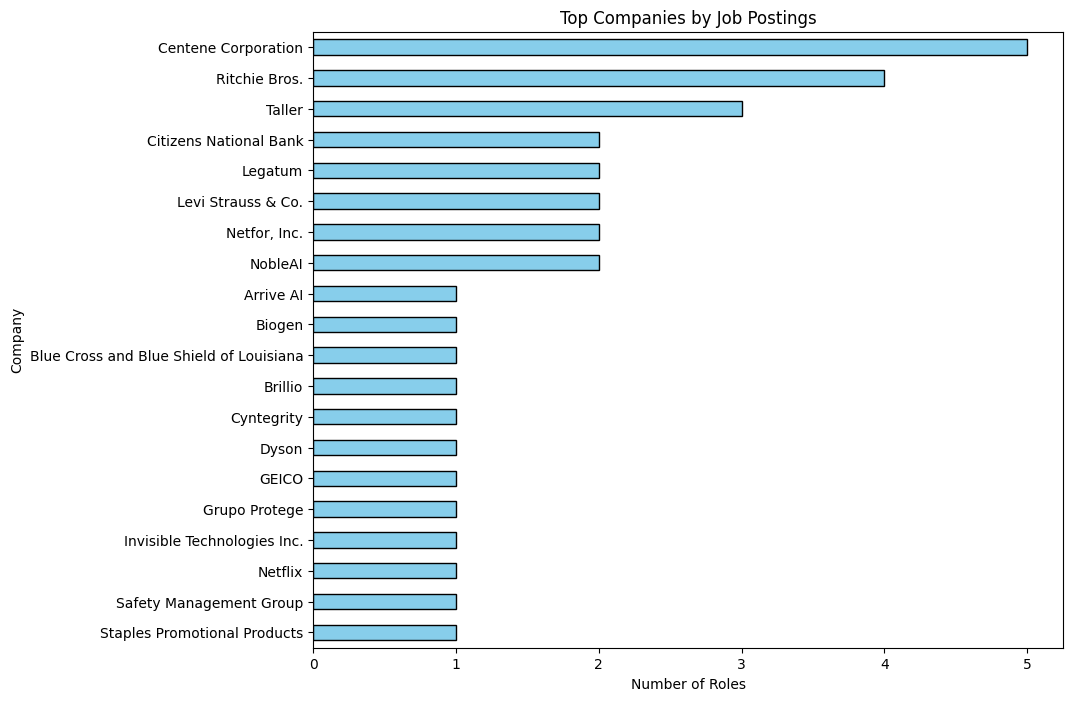

In [11]:
# Group companies by role
company_role_group = df_roles.groupby(['Company', 'Position']).size().reset_index(name='Count')
company_totals = company_role_group.groupby('Company')['Count'].sum().nlargest(20)

# Create subplot
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.2, right=0.95)  # Adjust layout spacing
company_totals.plot(kind='barh', color='skyblue', edgecolor="black")

# Add labels and title
plt.title("Top Companies by Job Postings")
plt.xlabel("Number of Roles")
plt.ylabel("Company")

# Improve layout
plt.gca().invert_yaxis()  # Ensures the company with the highest count appears at the top
plt.show()

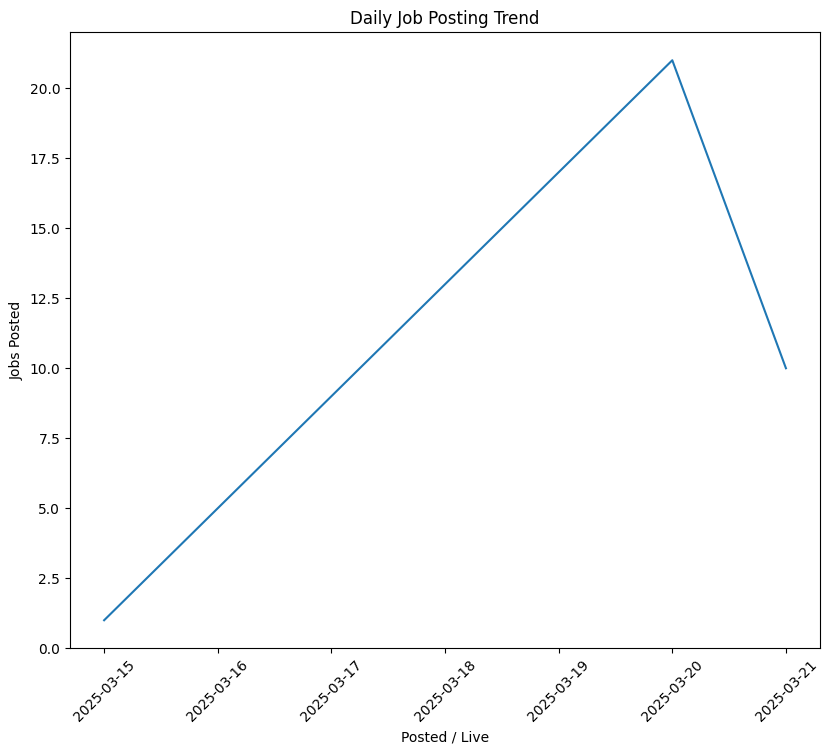

In [12]:
# ------------------------------------
# 3. Group Roles by Time (Daily Trend)
# ------------------------------------
roles_by_time = df_roles.groupby(df_roles['Posted / Live'].dt.date).size().reset_index(name='Jobs Posted')

plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.2, right=0.95)  # Adjust layout spacing
sns.lineplot(data=roles_by_time, x='Posted / Live', y='Jobs Posted')
plt.title("Daily Job Posting Trend")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Remote vs On-Site DS/ML Jobs')

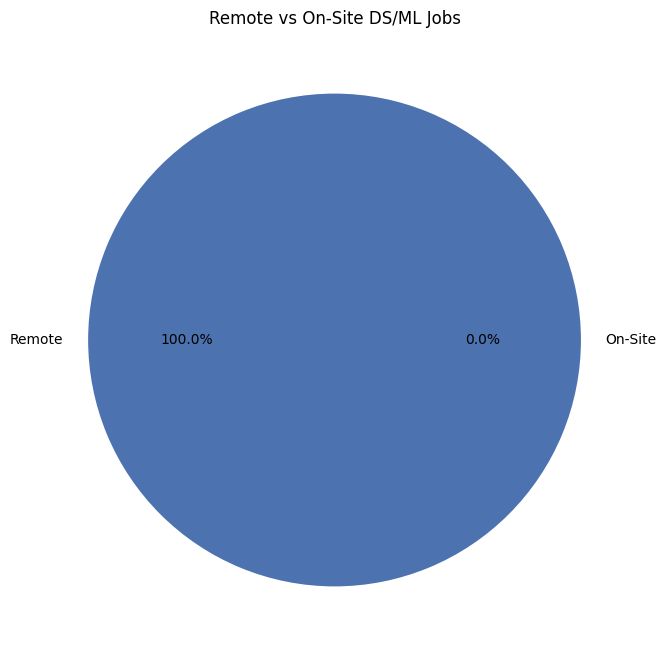

In [13]:
# ------------------------------------
# 4. Remote Jobs in DS/ML Fields
# ------------------------------------
remote_jobs = df_roles[df_roles['Remote?'] == 'Yes']
remote_count = len(remote_jobs)
onsite_count = len(df_roles) - remote_count

plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.2, right=0.95)  # Adjust layout spacing

plt.pie([remote_count, onsite_count], 
        labels=['Remote', 'On-Site'], 
        autopct='%1.1f%%', 
        colors=['#4c72b0','#dd8452'])
plt.title("Remote vs On-Site DS/ML Jobs")

<Figure size 1000x800 with 0 Axes>

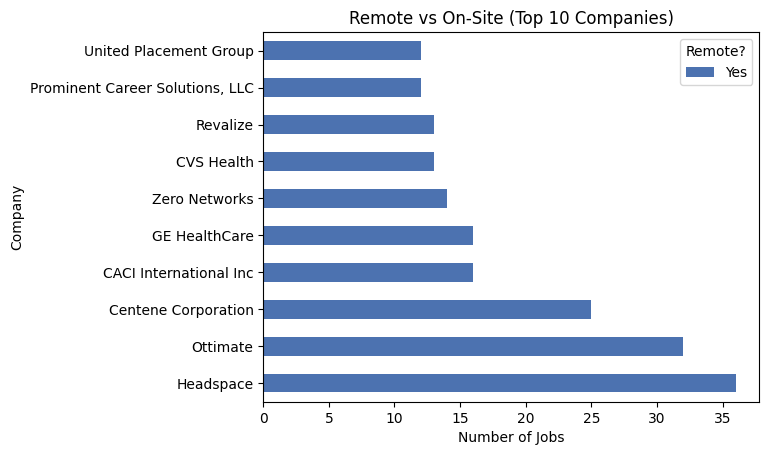

In [14]:
# ------------------------------------
# 5. Remote vs On-Site Jobs (Top 10 Companies)
# ------------------------------------
remote_group = df.groupby(['Company', 'Remote?']).size().unstack(fill_value=0)

# Check if "No" exists in columns (adjust based on your data)
valid_columns = [col for col in ['Yes', 'No'] if col in remote_group.columns]
remote_group['Total'] = remote_group.sum(axis=1)
top_companies = remote_group.nlargest(10, 'Total')

plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.2, right=0.95)  # Adjust layout spacing
top_companies[valid_columns].plot(kind='barh', stacked=True, color=['#4c72b0','#dd8452'])
plt.title("Remote vs On-Site (Top 10 Companies)")
plt.xlabel("Number of Jobs")
plt.show()